In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
print(df['Exited'].value_counts())

0    7963
1    2037
Name: Exited, dtype: int64


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
missing_values=df.isnull().sum()

In [13]:
print(missing_values)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


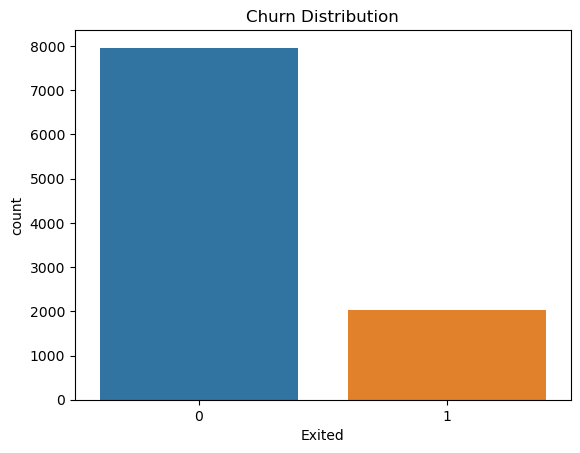

In [20]:
sns.countplot(x='Exited',data=df)
plt.title('Churn Distribution')
plt.show()

In [14]:
correlation_matrix=df.corr()

C:\Users\kanik_qfjkecq\AppData\Local\Temp\ipykernel_12972\2312581054.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr()


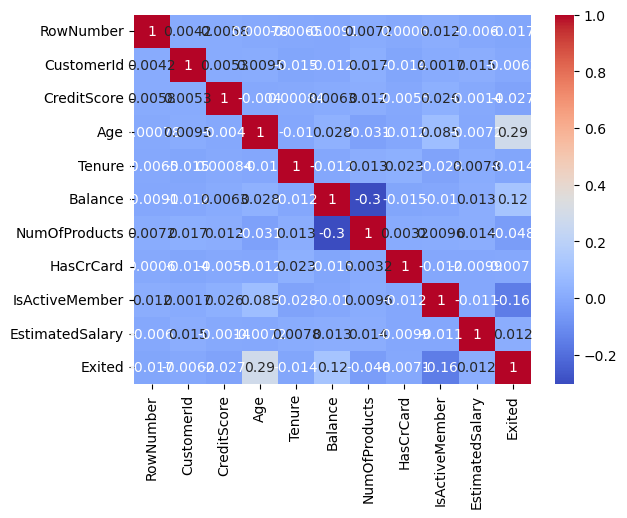

In [15]:
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [19]:
features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
                     'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                     'EstimatedSalary']

In [20]:
target= 'Exited'

In [21]:
X = df[features]
y = df[target]

In [22]:
categorical_features = ['Geography', 'Gender']
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                      'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

In [23]:
preprocessor=ColumnTransformer([('num','passthrough',numerical_features),('cat',OneHotEncoder(),categorical_features)])

In [24]:
X1=preprocessor.fit_transform(X)

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.25,random_state=42)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [62]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_predict1=dtc.predict(X_test)

accuracy1=accuracy_score(y_test,y_predict1)
print(accuracy1)

classification_report1=classification_report(y_test,y_predict1)
print(classification_report1)

confusion_matrix1=confusion_matrix(y_test,y_predict1)
print(confusion_matrix1)

0.7988
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2003
           1       0.49      0.50      0.50       497

    accuracy                           0.80      2500
   macro avg       0.69      0.69      0.69      2500
weighted avg       0.80      0.80      0.80      2500

[[1747  256]
 [ 247  250]]


In [64]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_predict2=lr.predict(X_test)

accuracy2=accuracy_score(y_test,y_predict2)
print(accuracy2)

classification_report2=classification_report(y_test,y_predict2)
print(classification_report2)

confusion_matrix2=confusion_matrix(y_test,y_predict2)
print(confusion_matrix2)


0.8
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2003
           1       0.48      0.08      0.14       497

    accuracy                           0.80      2500
   macro avg       0.65      0.53      0.52      2500
weighted avg       0.75      0.80      0.74      2500

[[1958   45]
 [ 455   42]]


In [66]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_predict3=gb.predict(X_test)

accuracy3=accuracy_score(y_test,y_predict3)
print(accuracy3)

classification_report3=classification_report(y_test,y_predict3)
print(classification_report3)

confusion_matrix3=confusion_matrix(y_test,y_predict3)
print(confusion_matrix3)

0.872
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.79      0.49      0.60       497

    accuracy                           0.87      2500
   macro avg       0.84      0.73      0.76      2500
weighted avg       0.86      0.87      0.86      2500

[[1938   65]
 [ 255  242]]
